In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

The raw code for this IPython notebook is by default <b>hidden</b> for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>''')

First, some modules are necessary.

In [2]:
# loading modules
# for walking dirs, searching tiffs:
import fnmatch
import os

# for numeric computations
import numpy as np

# for reading tiffs - one img
import matplotlib.image as mpimg

# to read all slices into numpy array
# https://stackoverflow.com/questions/37722139/load-a-tiff-stack-in-a-numpy-array-with-python
# beware of order! it is z,y,x (slice,x_coord, y_coord)
from skimage import io

# for plotting
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# for manipulting data
import pandas as pd

Next - how to read all tiff's in directory and/or subdirectories

In [3]:
#TODO jak ustawić biezący katalog lub wybor katalogu
# na zyletce
rootPath = '/home/magt/Rodeo/tify'

# w pracy 212
# rootPath = '/home/magt/Rodeo yhat/tify/'

images = ['*.tif', '*.tiff']
files = []
file_list = []

for root, dirnames, filenames in os.walk(rootPath):
    for extensions in images:
        for filename in fnmatch.filter(filenames, extensions):
            file_list.append(filename)
            files.append(os.path.join(root, filename))

# print(matches)
#print(file_list)

#img1 = mpimg.imread(files[1])
#print(type(img1))

Now, it is time to read all slices of our tiff image

In [4]:
im = io.imread('/home/magt/Rodeo/tify/Experiment-392.czi - C=b.tif')
print (im.shape)
print(im.dtype)
print(type(im))
dim_z = im.shape[0]
dim_y = im.shape[1]
dim_x = im.shape[2]

print(dim_x,dim_y,dim_z)

# arr[arr<5] | Returns array elements smaller than 5

(18, 1040, 1388)
uint16
<class 'numpy.ndarray'>
1388 1040 18


Here we have 18 slices of image. image has 1040px as Y(vertical) and 1388px horizontally (as X).

We can display fragment - 1st slice and five first elements

In [33]:
slice_0 = im[0,0:15,0:14]
# print(slice_0)

In [34]:
dim_y0 = slice_0.shape[1]
dim_x0 = slice_0.shape[0]

slice_0.shape

# st = slice_0.transpose()
# st.shape

(15, 14)

In [31]:
wsp_x = []
wsp_y = []
wsp_z = []

for i in range(0,dim_x0):
    for j in range(0,dim_y0):
        z = slice_0[i,j]
        # print(i,j,z)
        wsp_x.append(i)
        wsp_y.append(j)
        wsp_z.append(z)

scalenie do multidim np.array (sklejenie kolumn) wsp = np.c_[wsp_x,wsp_y,wsp_z]

<IPython.core.display.Javascript object>


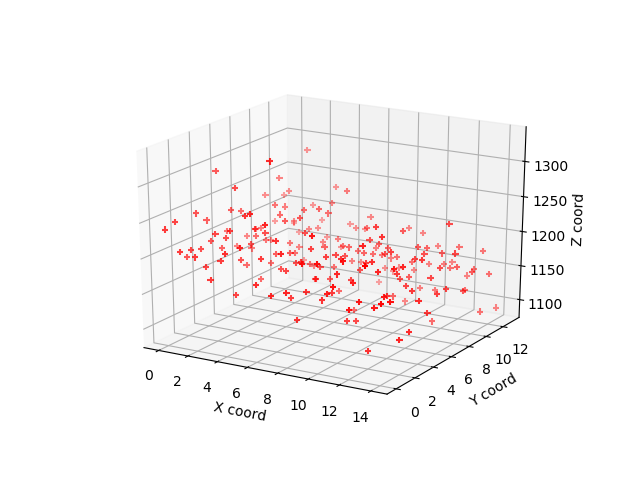

In [32]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')

# współrzędne to lista
# kazda grupa to jeden ax scatter ze wspolrzednymi
ax.scatter(wsp_x, wsp_y, wsp_z, c='r', marker='+')
#ax.scatter(obj_2['x'].tolist(), obj_2['y'].tolist(), obj_2['z'].tolist(), c='b', marker='^')
#ax.scatter(obj_3['x'].tolist(), obj_3['y'].tolist(), obj_3['z'].tolist(), c='g', marker='o')

ax.set_xlabel('X coord')
ax.set_ylabel('Y coord')
ax.set_zlabel('Z coord')

plt.show()

Ok, so we need to produce visualisation: X as x_coord, Y as y_coord and slice as z_coord. The value on crossection of X and Y is fluorescence intensity, so it would be good to make this as color(grayscale) intensity.

Scatterplot3D in matplotlib requires x,y and z coord as a list.

In [9]:
slice0_as_list = slice_0.tolist()
print(slice0_as_list)

[[1239, 1243, 1187, 1243], [1211, 1207, 1203, 1207], [1207, 1187, 1227, 1215], [1179, 1199, 1235, 1187], [1219, 1155, 1259, 1235]]


In [10]:
df=pd.DataFrame(slice_0)
df.head()

0     1     2     3
0  1239  1243  1187  1243
1  1211  1207  1203  1207
2  1207  1187  1227  1215
3  1179  1199  1235  1187
4  1219  1155  1259  1235

Let's draw a slice

In [11]:
df[0] # wybór kolumny

0    1239
1    1211
2    1207
3    1179
4    1219
Name: 0, dtype: uint16

In [21]:
# Create an array
points = np.arange(-5, 5, 1)

# Make a meshgrid
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs ** 2 + ys ** 2)

# Display the image on the axes
plt.imshow(z, cmap=plt.cm.gray)

# Draw a color bar
plt.colorbar()

# Show the plot
plt.show()  

<IPython.core.display.Javascript object>


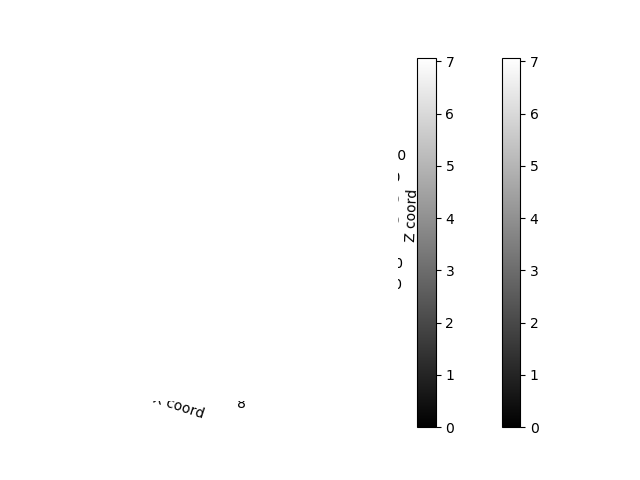

<class 'pandas.core.frame.DataFrame'>


In [14]:
testing_set = pd.read_csv('mysz.csv', delimiter=';', decimal=',')
how_many_obj = testing_set.id.unique()

# 1szy obiekt
obj_1 = testing_set[testing_set['id'] == 1]

# 2gi obiekt
obj_2 = testing_set[testing_set['id'] == 2]

# 3ci obiekt
obj_3 = testing_set[testing_set['id'] == 3]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# współrzędne to lista
# kazda grupa to jeden ax scatter ze wspolrzednymi
ax.scatter(obj_1['x'].tolist(), obj_1['y'].tolist(), obj_1['z'].tolist(), c='r', marker='+')
ax.scatter(obj_2['x'].tolist(), obj_2['y'].tolist(), obj_2['z'].tolist(), c='b', marker='^')
ax.scatter(obj_3['x'].tolist(), obj_3['y'].tolist(), obj_3['z'].tolist(), c='g', marker='o')

ax.set_xlabel('X coord')
ax.set_ylabel('Y coord')
ax.set_zlabel('Z coord')

plt.show()

print(type(testing_set))

In [15]:
  # Import NumPy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Create an array
points = np.arange(-5, 5, 0.01)

# Make a meshgrid
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs ** 2 + ys ** 2)

# Display the image on the axes
plt.imshow(z, cmap=plt.cm.gray)

# Draw a color bar
plt.colorbar()

# Show the plot
plt.show()  